In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Data Loading

In [2]:
# Loading the Training, Test and Sample Dataset using Pandas Read Csv function
df_train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv') 
df_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
df_sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')

# Importing Libraries

In [3]:
# Libraries that are going to be Used in Notebook
from sklearn.impute import  SimpleImputer       # Imputer for Imputing Missing Values
from sklearn.preprocessing import LabelEncoder  # Encoder for encoding Categorical Variables
from sklearn.compose import ColumnTransformer   # Transformer to Transform Columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder   # Scaler's for Scaling numerical variables
from sklearn.linear_model import LogisticRegression   # Linear Logistic Regression Model
from sklearn.metrics import accuracy_score     # Metric for Competition Submission
from sklearn.pipeline import Pipeline          # Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier # Ensemble Learning Classifiers
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # SearchCV for HyperTuning the Models
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix # Reports for confusion matrix and classification
from sklearn.model_selection import train_test_split # Spliting Train dataset into validation and Train
from xgboost import XGBClassifier   # Importing XGBClassifier for classification model

In [4]:
import seaborn as sns      # For Data Visualization in EDA
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore') # Used To ignore Warnings like Convergence etc.

# Data Segmenting

In [6]:
df_train.shape #

(20000, 22)

In [7]:
df_test.shape

(5000, 21)

In [8]:
df_EDA_train = df_train.copy()
df_EDA_test = df_test.copy()

# Exploratory Data Analysis

**Columns Description:**

* Location: Street address of the crime incident.
* Cross_Street: Cross street of the rounded address.
* Latitude: Latitude coordinates of the crime incident.
* Longitude: Longitude coordinates of the crime incident.
* Date_Reported: Date the incident was reported.
* Date_Occurred: Date the incident occurred.
* Time_Occurred: Time the incident occurred in 24-hour military time.
* Area_ID: LAPD's Geographic Area number.
* Area_Name: Name designation of the LAPD Geographic Area.
* Reporting_District_no: Reporting district number.
* Part 1-2: Crime classification.
* Modus_Operandi: Activities associated with the suspect.
* Victim_Age: Age of the victim.
* Victim_Sex: Gender of the victim.
* Victim_Descent: Descent code of the victim.
* Premise_Code: Premise code indicating the location of the crime.
* Premise_Description: Description of the premise code.
* Weapon_Used_Code: Weapon code indicating the type of weapon used.
* Weapon_Description: Description of the weapon code.
* Status: Status of the case.
* Status_Description: Description of the status code.
* Crime_Category: The category of the crime (Target Variable)

In [9]:
pd.set_option('display.max_columns', None)  # Used to View All columns in Pd funcs like head

#### Train Dataset

In [10]:
df_EDA_train.head() # Visual of Top 5 Rows of Train Dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [11]:
df_EDA_train.tail() # Visual of Bottom 5 Rows of Train Dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,2.0,0416 0446 2004 0913,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,1.0,0344 1822 1420,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order
19999,DALTON AV,VERNON AV,34.0037,-118.3034,02/18/2020 12:00:00 AM,02/17/2020 12:00:00 AM,1800.0,3.0,Southwest,397.0,1.0,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


In [12]:
df_EDA_train.info() # Giving Basic info of train dataset including Non_Null values and DataType of Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [13]:
df_EDA_train.isnull().sum() # Checking For Null values in Train Dataset

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

**Insights**
* Cross_Street Variable has maximum number of Null Values in Train Dataset followed by Weapon_Used_Code & Weapon_Description
* Victim_Sex and Victim_Desent has least number of Null Values out of all columns that have Null values

In [14]:
df_EDA_train.describe(include='object') # Describing Object Dtype Columns 

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,826,8538,6143,5033,3990,15236,15236,11666


**Insights**
* Location Column has Highest No of Unique Values Followed by Modus_Operandi
* Status & Status_Description has same no of unique values can either one can be used in Training Dataset as both contribute to same thing
* Target Variable has 6 Unique Values from which Property Crimes is most Frequent with 11666 times appearing

In [15]:
df_EDA_train.describe(exclude='object') # Describing Not Object Dtype Columns 

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


**Insights**
* Victim_Age Column has negative ages which are not possible and needs to be replaced.
* Part 1-2 Majority Incidents are 1 as mean is closer to 1 with frequent occurences of 2
* Premise_Code are in range between [101,969]
* In Time_Occurred The minimum time is at 1:00 AM while Max time is at 11:59 PM 

In [16]:
for col in df_EDA_train.select_dtypes(exclude='object'):       # Looping over Not Object Dtypes Columns  
    print(col,df_EDA_train[col].nunique())                    # Printing Column Name & No of Unique values in them

Latitude 3622
Longitude 3578
Time_Occurred 996
Area_ID 21
Reporting_District_no 1120
Part 1-2 2
Victim_Age 100
Premise_Code 217
Weapon_Used_Code 57


**Insights**
* Latitude has maximum number of unique values followed by Longitude
* Part 1-2 has least number of unique values only 2
* Victim_AGE jas 100 unique values including negative ones and 0

#### Test Dataset

In [17]:
df_EDA_test.head() # Visual of Top 5 Rows of Test Dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,1.0,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,2.0,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [18]:
df_EDA_test.tail()  # Visual of Bottom 5 Rows of Test Dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,1.0,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,1.0,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,2.0,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,2.0,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other
4999,10100 S SAN PEDRO ST,NaN,33.9438,-118.2695,10/09/2020 12:00:00 AM,10/09/2020 12:00:00 AM,320.0,18.0,Southeast,1823.0,2.0,1822 0329,49.0,M,B,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont


In [19]:
df_EDA_test.info() # Giving Basic info of test dataset including Non_Null values and DataType of Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

In [20]:
df_EDA_test.isnull().sum() # Checking For Null values in Test Dataset

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

**Insights**
* Similar Pattern to Train Dataset Null Values Columns is followed

In [21]:
df_EDA_test.describe(include='object') # Describing Object Dtype Columns (Similar to Train)

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description
count,5000,810,5000,5000,5000,4316,4357,4357,4999,1847,5000,5000
unique,4165,547,514,366,21,2961,4,16,145,53,5,5
top,7TH ST,FIGUEROA ST,06/19/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
freq,10,12,31,27,301,199,2121,1536,1257,1003,3830,3830


In [22]:
df_EDA_test.describe(exclude='object') # Describing Non Object Dtype Columns (Similar to Train)

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


## Data Analysis using Plots and Profile Report

#### Using Profile Report

In [23]:
"""from ydata_profiling import ProfileReport # Library for generating Profile Report
profile_train = ProfileReport(df_EDA_train)
profile_train"""

'from ydata_profiling import ProfileReport # Library for generating Profile Report\nprofile_train = ProfileReport(df_EDA_train)\nprofile_train'

**Insights**
* Dataset has 10 Duplicate Rows
* Status & Status_Description are Highy Imbalanced Columns
* Histogram and Various Plots including Top Words of Categorical Data Presented in Columns
* Victim_Age has 4828 frequency for Age 0 while -1 & -2 have 4 & 2 Respectively

#### Using Graphs

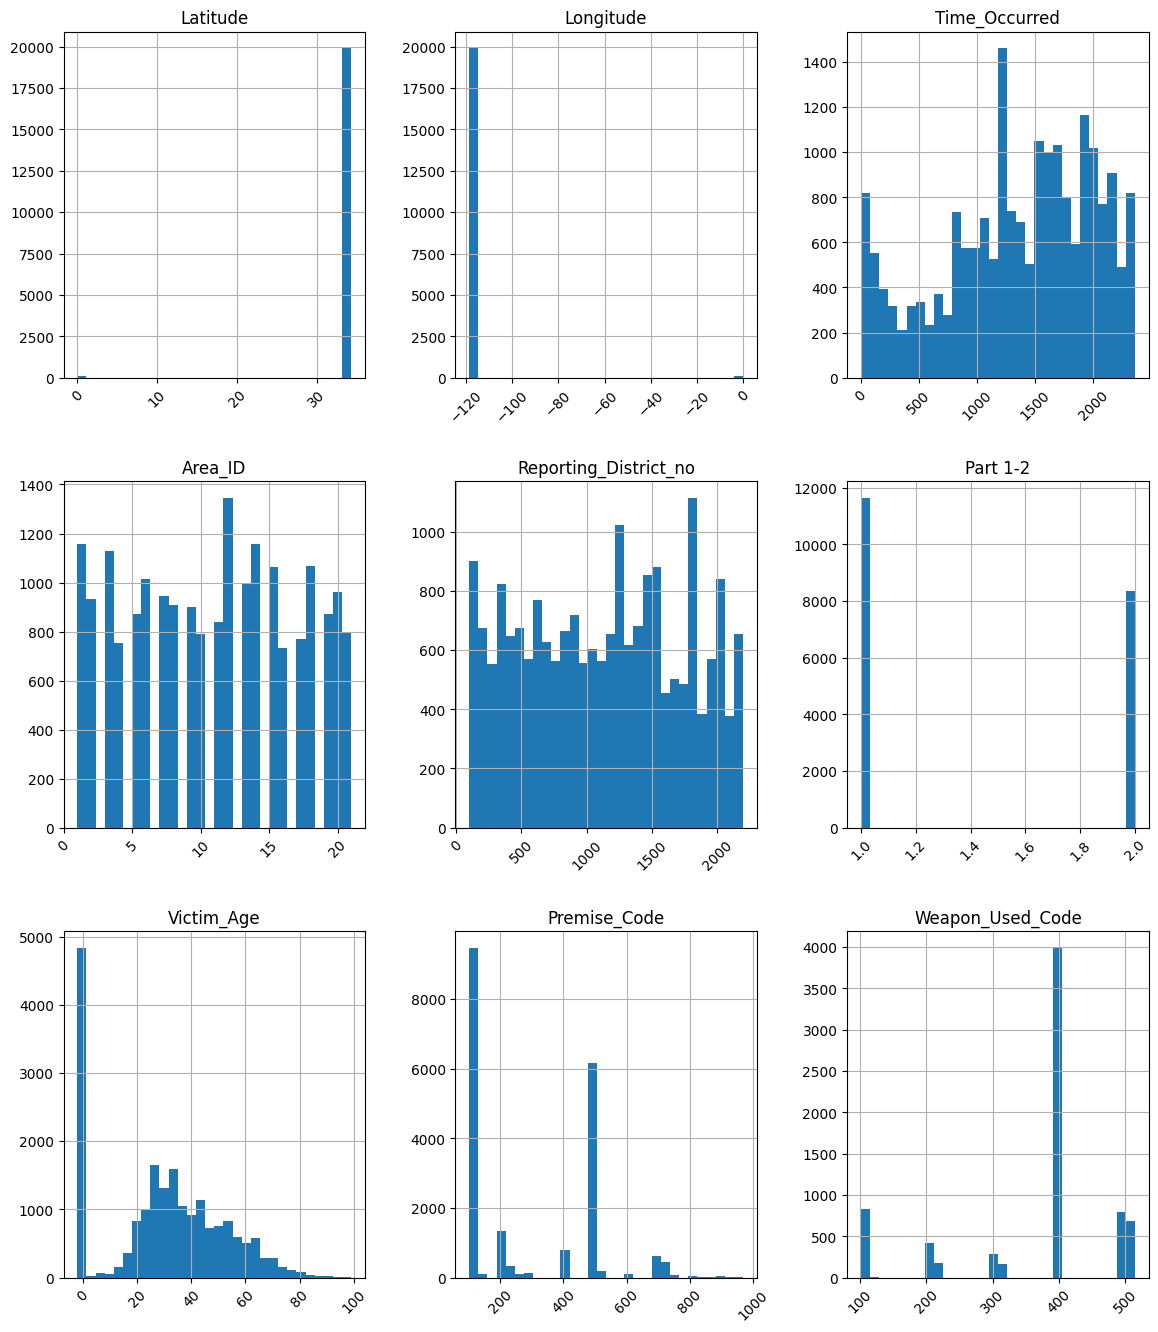

In [24]:
df_EDA_train.hist(figsize=(14,14), xrot=45, bins=30)   # Figure size 14x14 and X axis rotation = 45 degree
plt.subplots_adjust(top=1)                 # Histograms of Numerical Datasets
plt.show() 

**Insights**
* Longitude and Latitude has Values close to certain specific values
* Area_ID and Reporting_District_No are distributed in Similar manner
* Weapon codes with value close to 400 are more frequent
* Crime Activity around time 5:00 AM is least
* Premis code has more frequent values around 100
* Victim_Age is least between 0 & 20 as well as above 80 which could mean Decreased crime activities

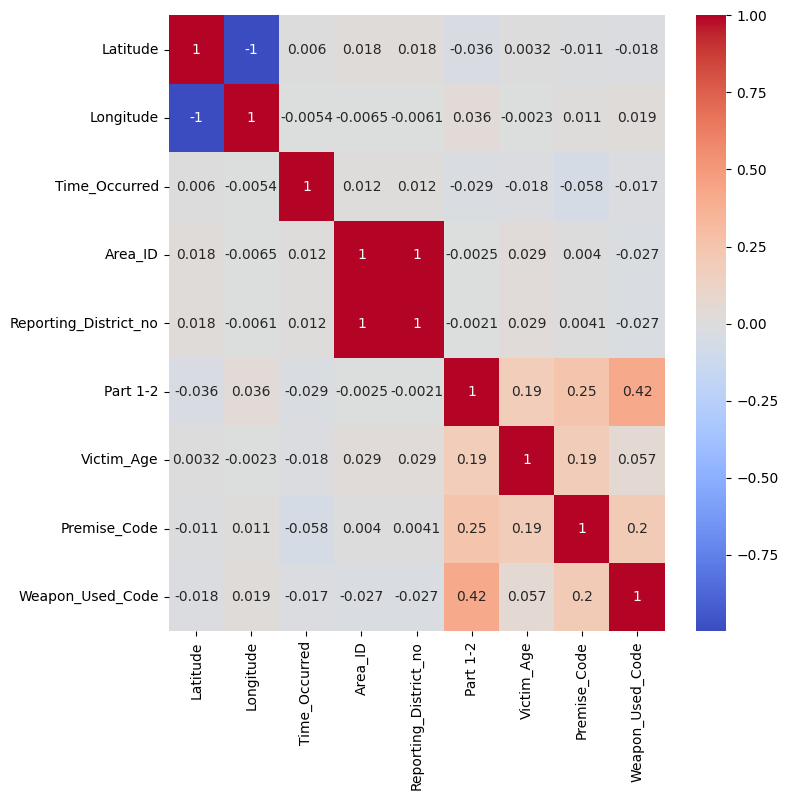

In [25]:
plt.figure(figsize=(8, 8))      
correlation_matrix = (df_EDA_train.select_dtypes(exclude='object')).corr()      # Excluded Object Dtype Columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)
plt.show()        # Correlation Heatmap of Numerical Values

**Insights**
* Columns Part 1-2, Victim_Age, Premise_Code, Weapon_Used_Code has low Positive Correlation

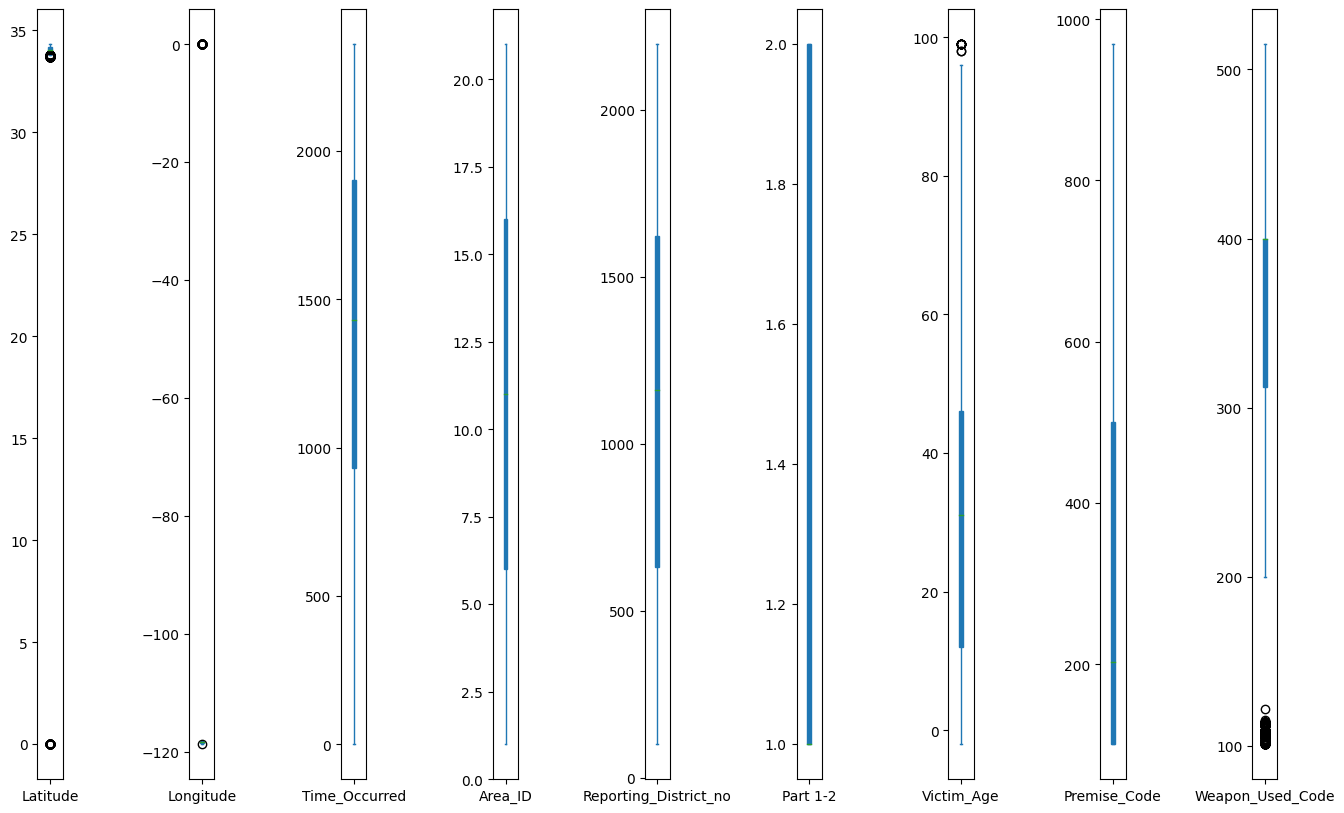

In [26]:
df_EDA_train.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 5)
plt.show()        # Box Plots for Outliers

**Insights**
* Latitude and Longitude has some Outliers

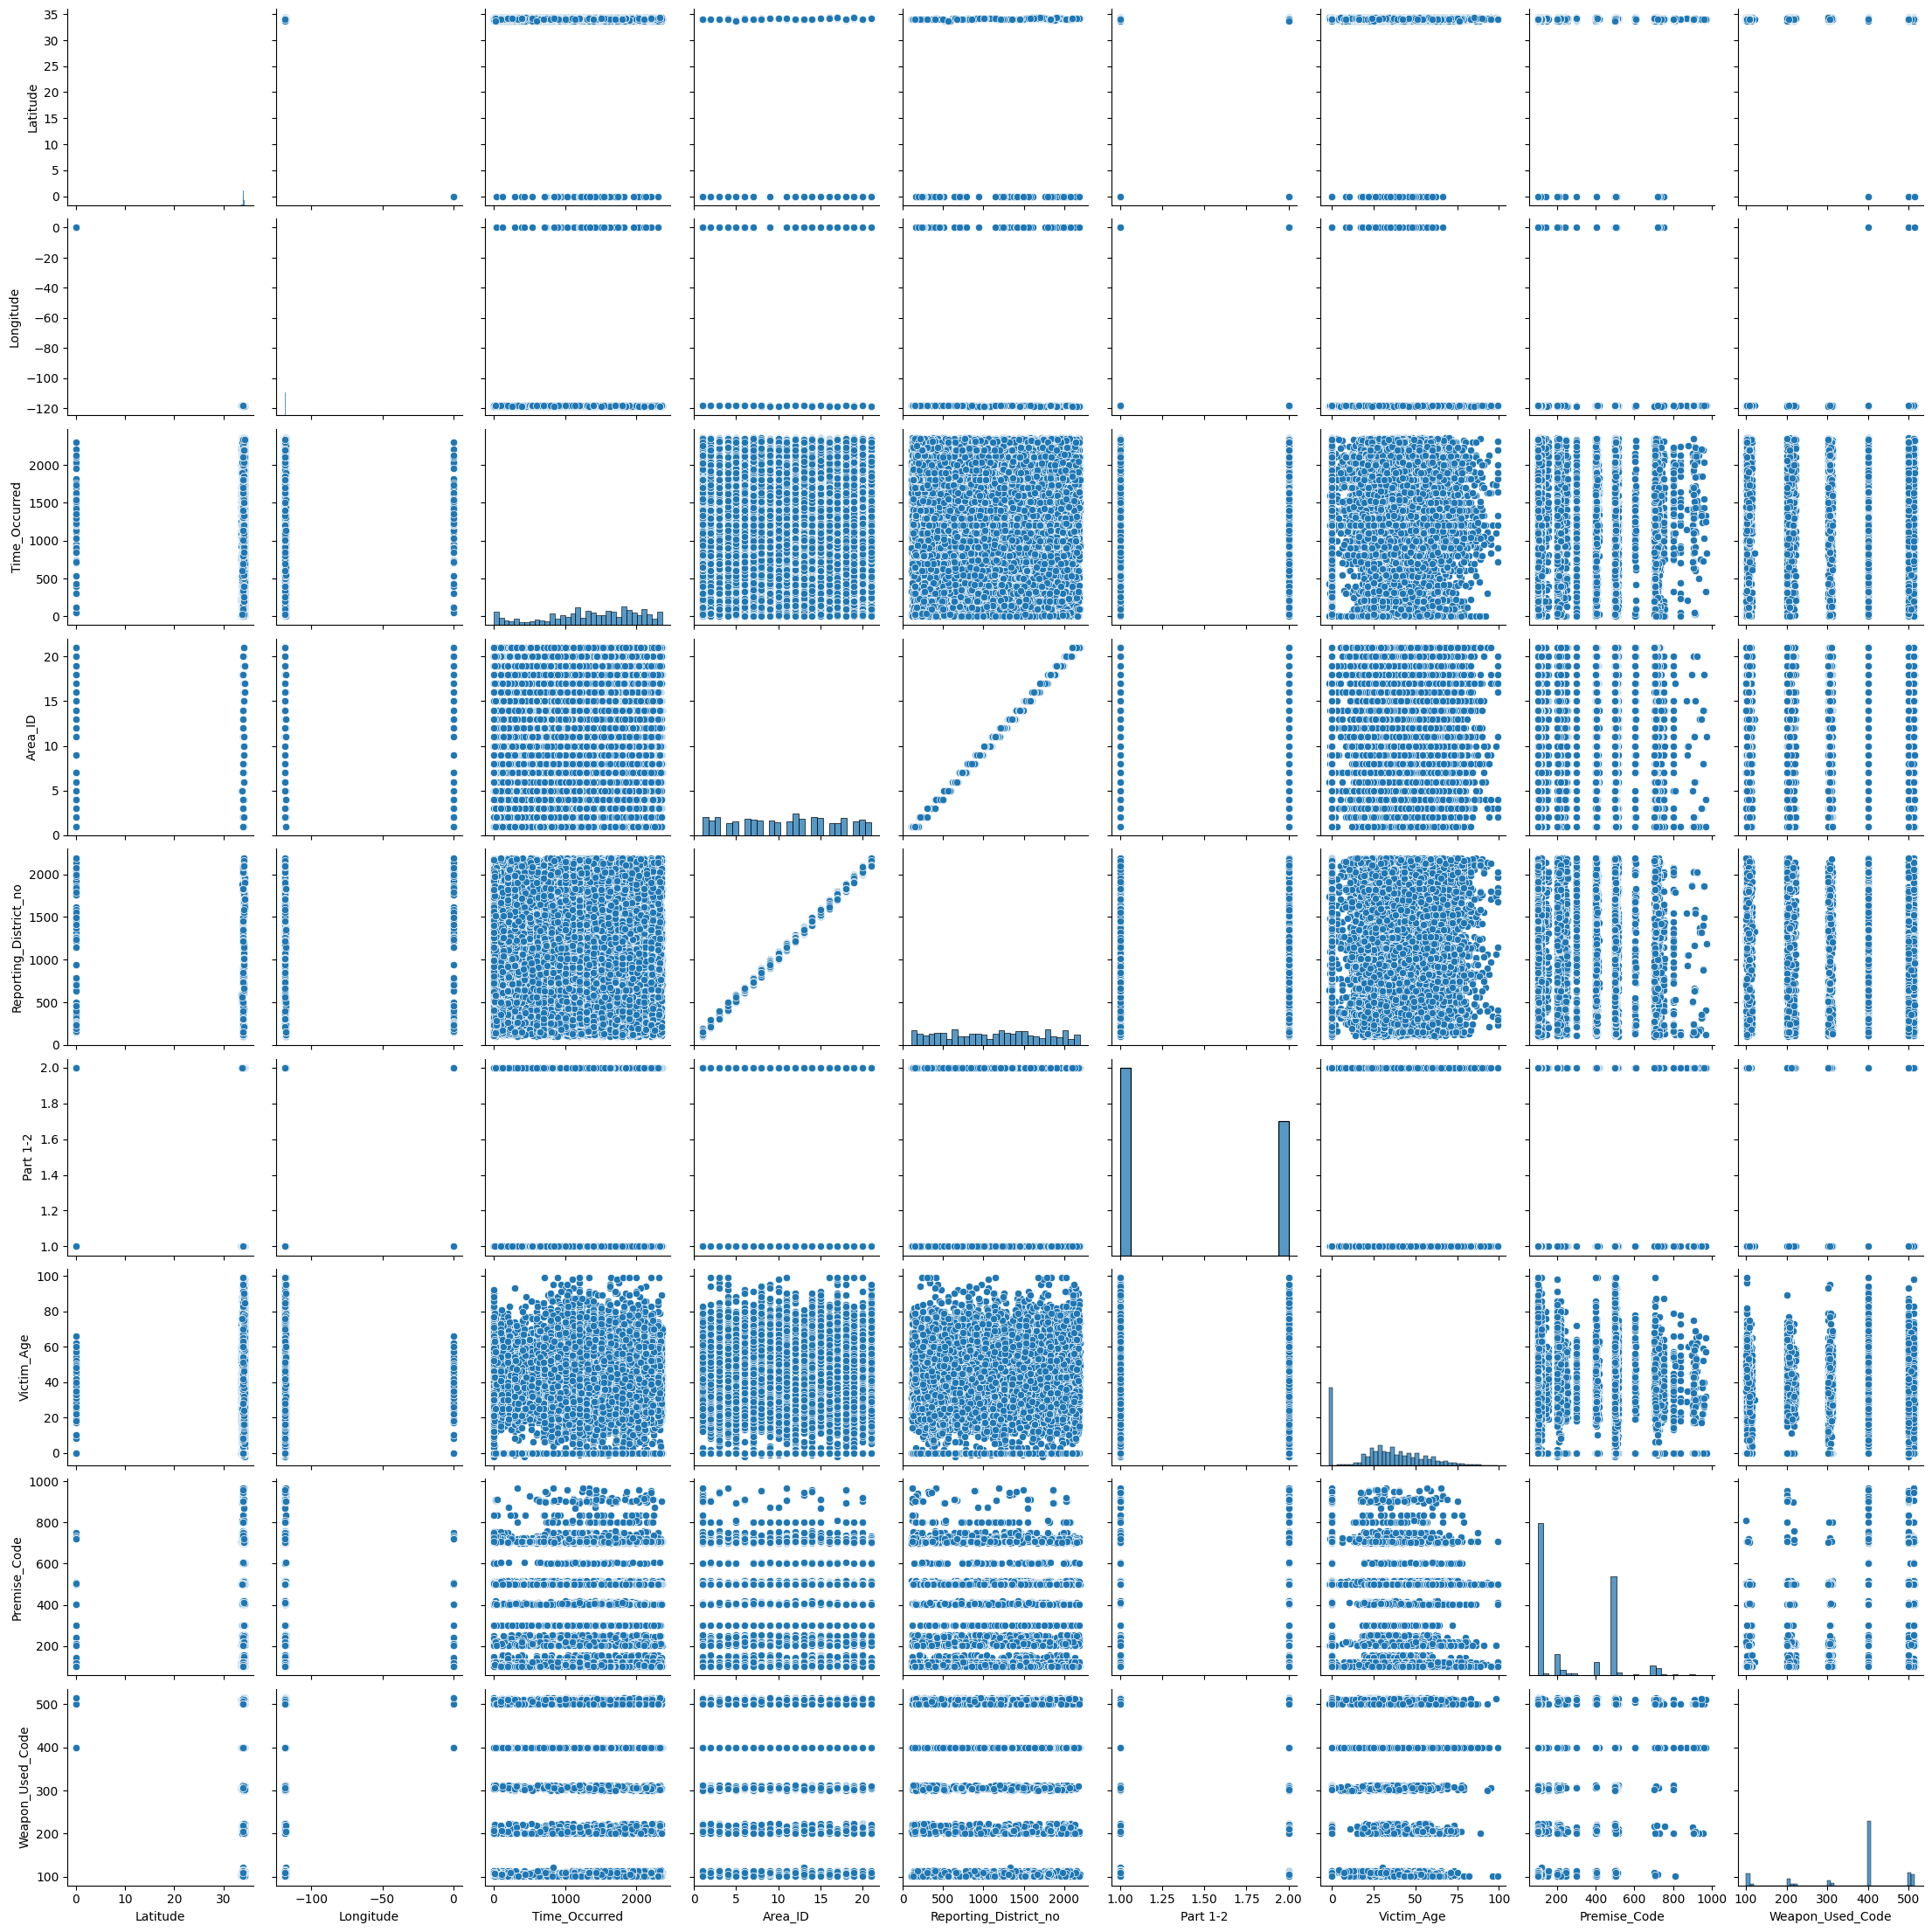

In [27]:
sns.pairplot(data=df_EDA_train)
plt.show()

**Insights**
* Reporting_Dist_No and Area_Code are showing Linear Correlation
* Victim age shows a right-skewed distribution, with most victims in their 20s to 40s.

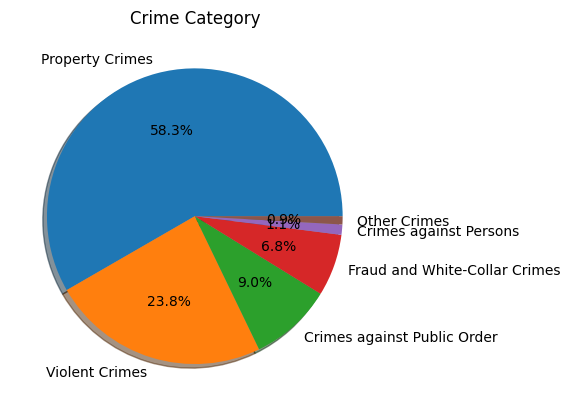

In [28]:
values = pd.Series(df_EDA_train['Crime_Category'])     # Generating Pie Chart of Crime Category Target Variable
val_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.title("Crime Category")
plt.pie(val_counts, labels=val_counts.index, autopct='%1.1f%%', shadow=True);

**Insights**
* Property Crime Occurs Most with  more than 50% followed by Violent Crimes
* Crimes against Persons and Other Crimes occur Least with around 1% 

<Axes: xlabel='Victim_Sex', ylabel='Count'>

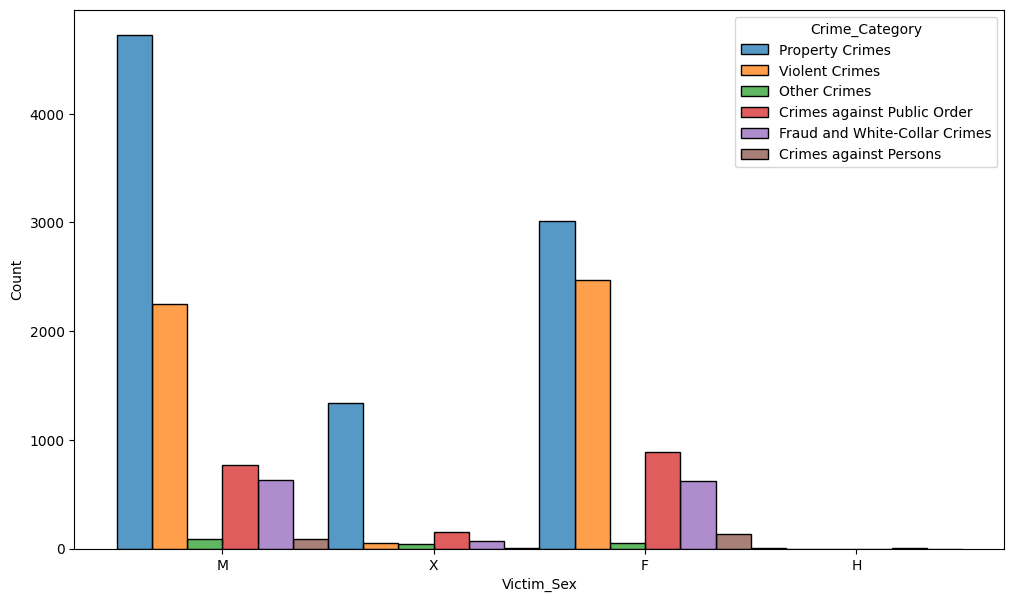

In [29]:
fig, ax = plt.subplots(figsize=(12,7))                # Histogram Plot to Show Victim Sex and Frequency of Different Crime with them
sns.histplot(data=df_EDA_train,x='Victim_Sex', hue='Crime_Category', multiple='dodge') 

**Insights**
* More male victims are reported compared to female victims.

<Axes: xlabel='Status', ylabel='Count'>

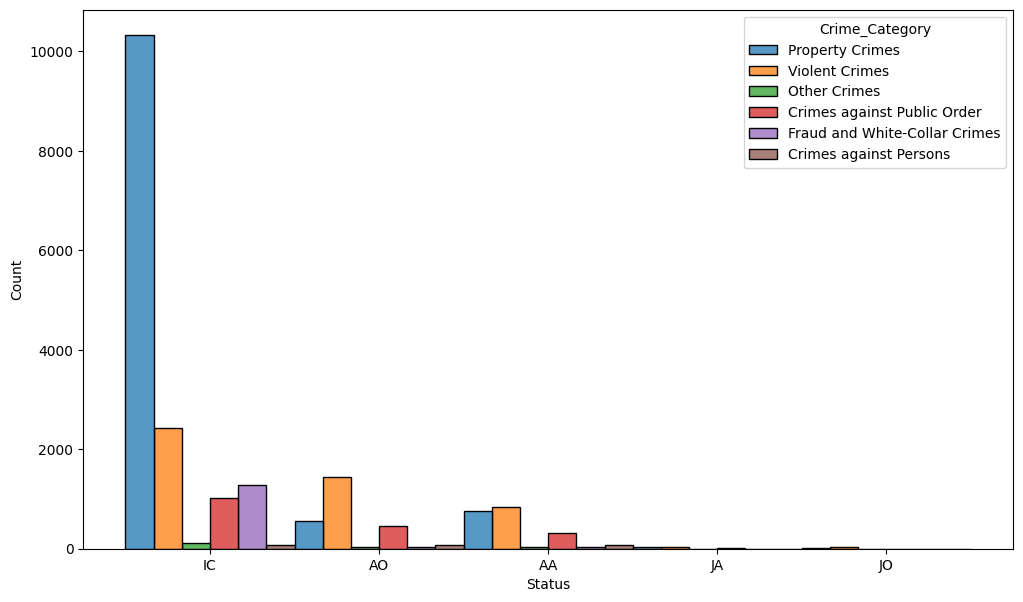

In [30]:
fig, ax = plt.subplots(figsize=(12,7))       # Status Codes Distribution with Crime Category
sns.histplot(data=df_EDA_train,x='Status', hue='Crime_Category', multiple='dodge')

#### Using Some Processed Data

In [31]:
df_EDA_train = df_EDA_train.replace({None: np.nan})          # Replacing values with np.nan
df_EDA_train = df_EDA_train.replace({"": np.nan})
df_EDA_train.fillna(value=0, inplace=True)                   # Filling Nan value with value 0 For EDA Purpose

In [32]:
df_EDA_train['Is_CrossStreet'] = df_EDA_train['Cross_Street'].apply(lambda x : 0 if x == 0 else 1)  # If cross street present then 1 else 0
df_EDA_train['Victim_Present'] = df_EDA_train['Victim_Age'].apply(lambda x : 0 if x <= 0 else 1)  # If victim_Age>0 then 1 else 0
df_EDA_train['Days_Lapsed'] = (pd.to_datetime(df_EDA_train['Date_Reported']) - pd.to_datetime(df_EDA_train['Date_Occurred'])).dt.days  # No of days between Reporting and Occuring of Crime
df_EDA_train['Day_Occurred'] = (pd.to_datetime(df_EDA_train['Date_Occurred'])).dt.day
df_EDA_train['WeekDay_Occurred'] = (pd.to_datetime(df_EDA_train['Date_Occurred'])).dt.weekday
df_EDA_train['Month'] = (pd.to_datetime(df_EDA_train['Date_Occurred'])).dt.month
df_EDA_train['Day_Rep'] = (pd.to_datetime(df_EDA_train['Date_Reported'])).dt.day
df_EDA_train['Reporting_District_no'] = df_EDA_train['Reporting_District_no'].astype(int) # Converting Reporting District No to int
df_EDA_train['Hour_Occ'] = df_EDA_train['Time_Occurred'].apply(lambda x: int(x/100)) # Simplifying time 1352 to 13.52
df_EDA_train['Part 1-2'] = df_EDA_train['Part 1-2'].astype(int) # Converting to Int type
df_EDA_train['Part 1-2'] = df_EDA_train['Part 1-2'].apply(lambda x: 0 if x == 1 else 1) # replacing if x==1 then 1 else 0
df_EDA_train['P_Code'] = df_EDA_train['Premise_Code'].apply(lambda x: int(x/100)) # Simplifying Premise code between 0 to 9

In [33]:
def is_arrested(status):
    if status == 'AA' or status == 'JA':
        return 1
    else:
        return 0
df_EDA_train['IsArrested'] = df_EDA_train['Status'].apply(is_arrested)

In [34]:
df_EDA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  int64  
 10  Part 1-2               20000 non-null  int64  
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         20000 non-null  object 
 15  Pr

In [35]:
crime_cat_list = ['Property Crimes','Violent Crimes','Crimes against Public Order',
                  'Fraud and White-Collar Crimes','Crimes against Persons','Other Crimes']

def encode_crime_category(crime):
    return crime_cat_list.index(crime)
def decode_crime_category(crime_num):
    return crime_cat_list[int(crime_num)]

In [36]:
df_EDA_train['Crime_Category'] = df_EDA_train['Crime_Category'].apply(encode_crime_category)

In [37]:
df_EDA_train.tail()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Is_CrossStreet,Victim_Present,Days_Lapsed,Day_Occurred,WeekDay_Occurred,Month,Day_Rep,Hour_Occ,P_Code,IsArrested
19995,5100 W ADAMS BL,0,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303,1,0416 0446 2004 0913,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1,0,1,0,24,6,5,24,7,5,0
19996,16900 ROSCOE BL,0,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008,0,1822 0209 0344 1414 1420,0.0,M,W,301.0,GAS STATION,0.0,0,IC,Invest Cont,0,0,0,0,25,4,12,25,2,3,0
19997,1000 S SHENANDOAH ST,0,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849,0,0344 1822 1420,42.0,M,H,102.0,SIDEWALK,0.0,0,IC,Invest Cont,0,0,1,0,25,4,9,25,14,1,0
19998,300 W SEPULVEDA ST,0,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558,1,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,SINGLE FAMILY DWELLING,0.0,0,IC,Invest Cont,2,0,1,0,10,2,6,10,6,5,0
19999,DALTON AV,VERNON AV,34.0037,-118.3034,02/18/2020 12:00:00 AM,02/17/2020 12:00:00 AM,1800.0,3.0,Southwest,397,0,0,0.0,0,0,101.0,STREET,0.0,0,IC,Invest Cont,0,1,0,1,17,0,2,18,18,1,0


In [38]:
"""plt.figure(figsize=(18,18))      
correlation_matrix = (df_EDA_train.select_dtypes(exclude='object')).corr()      # Excluded Object Dtype Columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)
plt.show()"""        # Correlation Heatmap of Numerical Values

"plt.figure(figsize=(18,18))      \ncorrelation_matrix = (df_EDA_train.select_dtypes(exclude='object')).corr()      # Excluded Object Dtype Columns\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)\nplt.show()"

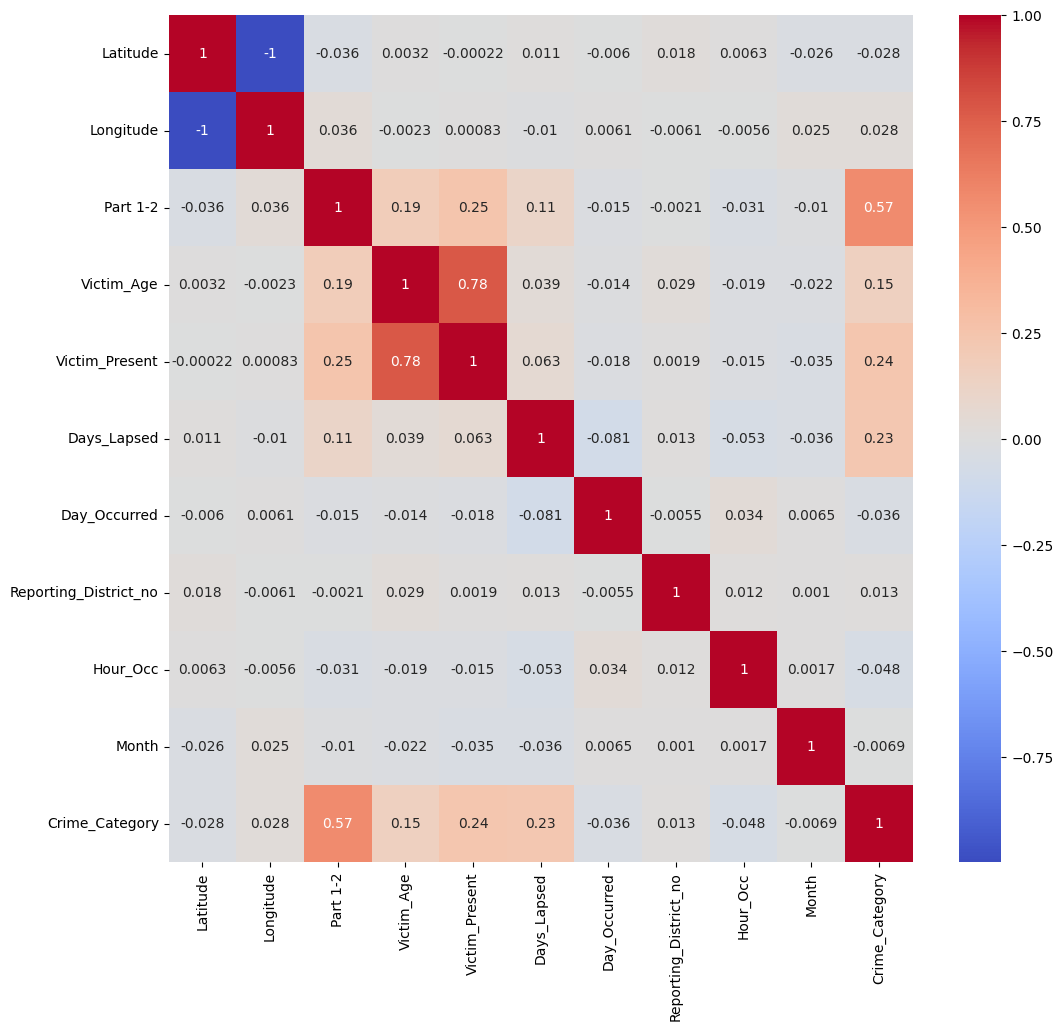

In [39]:
df_EDA_train_temp = df_EDA_train[['Latitude', 'Longitude', 'Part 1-2',
       'Victim_Age', 
       'Victim_Present', 'Days_Lapsed', 'Day_Occurred',
        'Reporting_District_no', 'Hour_Occ','Month',
       'Crime_Category']]
plt.figure(figsize=(12,11))      
correlation_matrix = (df_EDA_train_temp).corr()      # Excluded Object Dtype Columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)
plt.show() 

**Insights**
* Part 1-2 is Having High Correlation with Target Variable
* Victim_age, Victim_present, Days_Lapsed showing low but positive correlation with Target Variable

#### EDA Ended ####

# Processing of Train & Test Dataset

In [40]:
df_train_pre = df_train.copy()
df_test_pre = df_test.copy()

#### Cleaning Data

##### Handling Outliers

In [41]:
df_train_pre['Victim_Age'] = df_train_pre['Victim_Age'].apply(lambda x: 0 if x < 0 else x)   # If victim age <0 then put 0

#Drop rows if latitude and longitude are 0
lat_long_zero = df_train_pre[(df_train_pre['Latitude'] == 0) & (df_train_pre['Longitude']==0)].index  
df_train_pre.drop(lat_long_zero, inplace=True)
df_train_pre.shape

(19922, 22)

<Axes: title={'center': 'Latitude'}>

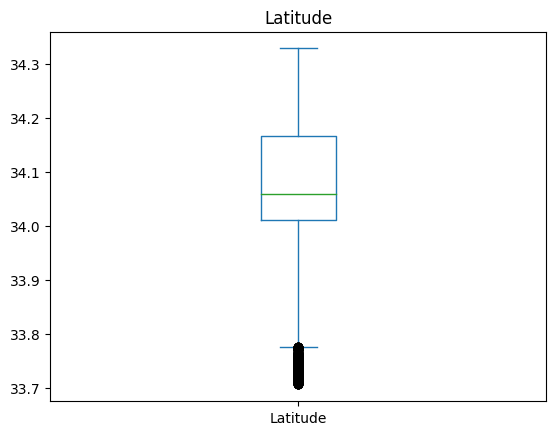

In [42]:
df_train_pre['Latitude'].plot(kind="box", title="Latitude") # Box Plot for Outliers Detection in Latitude

In [43]:
Q1 = df_train_pre['Latitude'].quantile(0.25)               # Removing Outliers of Latitude
Q3 = df_train_pre['Latitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
df_train_pre = df_train_pre[(df_train_pre['Latitude'] > lower_bound) & (df_train_pre['Latitude'] < upper_bound)]
df_train_pre.shape

(19462, 22)

<Axes: title={'center': 'Victim_Age'}>

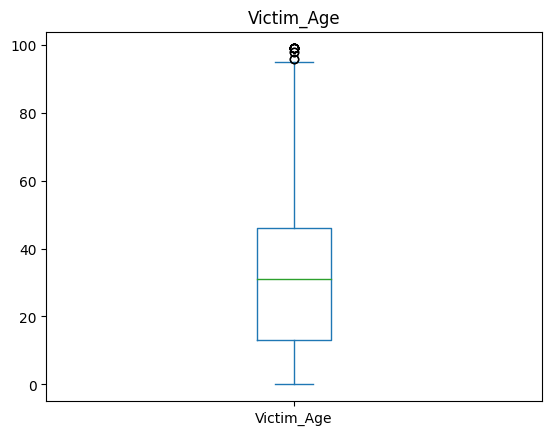

In [44]:
df_train_pre['Victim_Age'].plot(kind="box", title="Victim_Age")   # Box Plot for Outliers Detection in Victim Age

In [45]:
Q1 = df_train_pre['Victim_Age'].quantile(0.25)             # Removing Outliers of Victim Age
Q3 = df_train_pre['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
df_train_pre= df_train_pre[(df_train_pre['Victim_Age'] > lower_bound) & (df_train_pre['Victim_Age'] < upper_bound)]
df_train_pre.shape

(19447, 22)

#### Feature Engineering

In [46]:
# Helper Function to check if arrest is made or not in case
def is_arrested(status):
    if status == 'AA' or status == 'JA':
        return 1
    else:
        return 0

In [47]:
# Creating New Feature from Old Ones
def preparedata(df):
    df = df.replace({None: np.nan})
    df = df.replace({"": np.nan})
  
    # Checking for Cross Street Presence in column
    df['Is_CrossStreet'] = df['Cross_Street'].apply(lambda x : 0 if x == np.nan else 1) 
    
    # Checking if a victim is Present assuming age>0 means a Victim present
    df['Victim_Present'] = df['Victim_Age'].apply(lambda x : 0 if x <= 0 else 1)
    
    # Getting Number of Days between Crime Occur and Crime Reporting
    df['Days_Lapsed'] = (pd.to_datetime(df['Date_Reported']) - pd.to_datetime(df['Date_Occurred'])).dt.days
    
    # Getting Day of Crime Date Occured Handling Datetime Columns
    df['Day_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.day
    
    # Getting WeekDay of Crime Date Occured Handling Datetime Columns
    df['WeekDay_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.weekday
    
    # Getting Month of Crime Date Occured Handling Datetime Columns
    df['Month'] = (pd.to_datetime(df['Date_Occurred'])).dt.month
    
    # Getting Day of Crime Date Reported Handling Datetime Columns
    df['Day_Rep'] = (pd.to_datetime(df['Date_Reported'])).dt.day
    
     # Getting Day of Year of Crime Date Occured Handling Datetime Columns
    df['DayOfYear'] = (pd.to_datetime(df['Date_Occurred'])).dt.dayofyear
    
     # Converting Reporting District Number to Int Dtype Column
    df['Reporting_District_no'] = df['Reporting_District_no'].astype(int)
    
    # Getting Hour Occured value from TimeOccured by dividing by 100
    df['Hour_Occ'] = df['Time_Occurred'].apply(lambda x: int(x/100))
    
     # Converting Part 1-2 to Int Dtype Column
    df['Part 1-2'] = df['Part 1-2'].astype(int)
     # Simplyfying Part 1-2 Column by replacing value with 0 & 1 for 1 & 2 respectively
    df['Part 1-2'] = df['Part 1-2'].apply(lambda x: 0 if x == 1 else 1)
    
     # Getting a Simpler Pcode with only hundredth place value
    df['PCode'] = df['Premise_Code'].apply(lambda x: int(x/100))
    
    # Getting a new column to Represnt if a arrest is made using Status with helper function
    df['IsArrest'] = df['Status'].apply(is_arrested)
    
     # Commented Because Giving Better Results when not droping them         
    #Drop the following columns as they are redundant and already Represented by their counter Parts or New Features
    drop_cols = ['Area_Name','Premise_Description','Status_Description', 
                'Date_Reported', 'Date_Occurred',
                'Weapon_Description','Time_Occurred']
    
    # Droping Columns from Dataset
    df.drop(columns=drop_cols, inplace=True)

    return df # Return Dataset

 #### Handling Missing Values (Imputation) and Encoding Categorical Variables and Normalization

In [48]:
# Imputers
num_imputer_freq = SimpleImputer(strategy='most_frequent')  # Numerical Imputer with Most Frequent Strategy
num_imputer_mean = SimpleImputer(strategy='mean')           # Numerical Imputer with Mean Strategy (Giving Better Results)
cat_imputer_freq = SimpleImputer(strategy='most_frequent')  # Categorical Imputer with Most Frequent Strategy
cat_imputer_const = SimpleImputer(strategy='constant', fill_value='Unknown')  # Categorical Imputer with constant Unknown Fill

In [49]:
# Scalers for Numerical Variable
scaler_minmax = MinMaxScaler()       # Numerical Feature MinMaxScaler for Normalization/Scaling
scaler_standard = StandardScaler()   # Numerical Feature StandardScaler for Normalization/Scaling

In [50]:
# Encoder for Categorical Variable
onehot = OneHotEncoder(handle_unknown='ignore')

In [51]:
# Encoder for Target Column
labely = LabelEncoder()

 #### Preprocessor and Pipelines

In [52]:
# Numerical Transformer with Pipeline of Steps Imputer and Scaler for Numerical Features
numerical_transformer = Pipeline(steps=[
    ('imputer', num_imputer_mean),  
    ('scaler', scaler_standard)  
])

In [53]:
# Categorical Transformer with Pipeline of Steps Imputer and Encoding for Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', cat_imputer_const),  
    ('onehot', onehot) 
])

#### Dividing Train Dataset

In [54]:
df_processed = preparedata(df_train_pre)       # Processing The train dataset  
df_test_processed = preparedata(df_test_pre)

In [55]:
df_processed

,Location,Cross_Street,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Is_CrossStreet,Victim_Present,Days_Lapsed,Day_Occurred,WeekDay_Occurred,Month,Day_Rep,DayOfYear,Hour_Occ,PCode,IsArrest
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,15.0,1563,0,0385,75.0,M,W,101.0,NaN,IC,Property Crimes,1,1,3,6,4,3,9,66,18,1,0
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,13.0,1367,0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes,1,1,0,27,3,2,27,58,13,2,0
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,13.0,1343,1,0329 1202,67.0,M,B,501.0,NaN,IC,Property Crimes,1,1,0,21,4,8,21,234,6,5,0
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,19.0,1924,0,0329 1300,61.0,M,H,101.0,NaN,IC,Property Crimes,1,1,2,6,4,11,8,311,18,1,0
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,12.0,1245,0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes,1,0,0,25,1,2,25,56,11,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,100 W 106TH ST,NaN,33.9401,-118.2744,18.0,1832,1,0100 0922 1822,60.0,M,H,605.0,NaN,IC,Fraud and White-Collar Crimes,1,1,10,24,1,11,4,329,11,6,0
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,3.0,303,1,0416 0446 2004 0913,51.0,M,H,501.0,400.0,IC,Violent Crimes,1,1,0,24,6,5,24,145,7,5,0
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,10.0,1008,0,1822 0209 0344 1414 1420,0.0,M,W,301.0,NaN,IC,Property Crimes,1,0,0,25,4,12,25,360,2,3,0
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,8.0,849,0,0344 1822 1420,42.0,M,H,102.0,NaN,IC,Property Crimes,1,1,0,25,4,9,25,269,14,1,0


#### Used TfidfVectorizer for Modus_Operandi (Deacreasing Performance)

In [56]:
"""df_processed_tf = df_processed.copy()
df_processed_tf['Modus_Operandi']=df_processed_tf['Modus_Operandi'].fillna('Unknown')

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df_processed_tf['Modus_Operandi'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

df = pd.concat([df_processed_tf, tfidf_df], axis=1)

# Now your DataFrame 'df' contains the original columns plus the TF-IDF features
df
"""

"df_processed_tf = df_processed.copy()\ndf_processed_tf['Modus_Operandi']=df_processed_tf['Modus_Operandi'].fillna('Unknown')\n\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\n# Initialize the TfidfVectorizer\nvectorizer = TfidfVectorizer()\n\n# Fit and transform the text data\ntfidf_matrix = vectorizer.fit_transform(df_processed_tf['Modus_Operandi'])\n\n# Create a DataFrame from the TF-IDF matrix\ntfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())\n\ndf = pd.concat([df_processed_tf, tfidf_df], axis=1)\n\n# Now your DataFrame 'df' contains the original columns plus the TF-IDF features\ndf\n"

In [57]:
target_column = 'Crime_Category'
X = df_processed.drop(columns=[target_column,'Location','Cross_Street'])   # Droping Target Column
y = df_processed[target_column]  

In [58]:
"""target_column = 'Crime_Category'          # TfidfVectorizer Version
X = df.drop(columns=[target_column,'Modus_Operandi'])   # Droping Target Column
y = df[target_column]"""

"target_column = 'Crime_Category'          # TfidfVectorizer Version\nX = df.drop(columns=[target_column,'Modus_Operandi'])   # Droping Target Column\ny = df[target_column]"

In [59]:
y = labely.fit_transform(y)

In [60]:
# Finding Categorical and Numerical Cols
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols, numerical_cols

(Index(['Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Status'], dtype='object'),
 Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
        'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Is_CrossStreet',
        'Victim_Present', 'Days_Lapsed', 'Day_Occurred', 'WeekDay_Occurred',
        'Month', 'Day_Rep', 'DayOfYear', 'Hour_Occ', 'PCode', 'IsArrest'],
       dtype='object'))

In [61]:
# Spliting Train Dataset in Validation and Training set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

 #### Final Preprocessor

In [62]:
# Final Preprocessor applied using ColumnTransformer with  Numerical Transformer for Numerical Cols & Categorical Transformer for Categorical Cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Models

## Model 1: Logistic Regression

In [63]:
"""model = LogisticRegression(max_iter=1000)  # Machine Learning Model

# Model Training Pipeline with Preprocessor and Classifier Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])"""

"model = LogisticRegression(max_iter=1000)  # Machine Learning Model\n\n# Model Training Pipeline with Preprocessor and Classifier Model\npipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('classifier', model)\n])"

In [64]:
"""# Fitting the Pipeline and Predicting on Validation Set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))"""

'# Fitting the Pipeline and Predicting on Validation Set\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_val)\n\n# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset\nprint("\nValidation Accuracy:", accuracy_score(y_val, y_pred))\nprint("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))\nprint("Classification Report:\n", classification_report(y_val, y_pred))'

#### HyperParameter Tuning

In [65]:
"""model = LogisticRegression(warm_start=True)
param_dist = {
    'C': [0.1,1,10],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000,2000],
}
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)

n_iter_search = 15
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search,cv=5,n_jobs=-1)
random_search.fit(X_train_proc, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Make predictions on the test set
y_pred = random_search.predict(X_val_proc)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Test accuracy:", accuracy)"""

'model = LogisticRegression(warm_start=True)\nparam_dist = {\n    \'C\': [0.1,1,10],\n    \'penalty\': [\'l1\', \'l2\'],\n    \'max_iter\': [1000,2000],\n}\nX_train_proc = preprocessor.fit_transform(X_train)\nX_val_proc = preprocessor.transform(X_val)\n\nn_iter_search = 15\nrandom_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search,cv=5,n_jobs=-1)\nrandom_search.fit(X_train_proc, y_train)\n\n# Get the best hyperparameters\nbest_params = random_search.best_params_\nprint("Best hyperparameters:", best_params)\n\n# Make predictions on the test set\ny_pred = random_search.predict(X_val_proc)\n\n# Evaluate the model\naccuracy = accuracy_score(y_val, y_pred)\nprint("Test accuracy:", accuracy)'

## Model 2: GradientBoosting Classifier

In [66]:
"""model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.2,  # Step size for updates
    max_depth=5
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])"""

"model = GradientBoostingClassifier(\n    n_estimators=100,  # Number of boosting stages\n    learning_rate=0.2,  # Step size for updates\n    max_depth=5\n)\n\npipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('classifier', model)\n])"

In [67]:
"""# Fitting the Pipeline and Predicting on Validation Set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))"""

'# Fitting the Pipeline and Predicting on Validation Set\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_val)\n\n# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset\nprint("\nValidation Accuracy:", accuracy_score(y_val, y_pred))\nprint("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))\nprint("Classification Report:\n", classification_report(y_val, y_pred))'

#### HyperParameter Tuning

In [68]:
"""model = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators':[90,100,110],
    'learning_rate': [0.1,0.15,0.2],
    'max_depth': [5,7,9],

}

X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search,cv=5,n_jobs=-1)
random_search.fit(X_train_proc, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Make predictions on the test set
y_pred = random_search.predict(X_val_proc)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Test accuracy:", accuracy)"""

'model = GradientBoostingClassifier(random_state=42)\nparam_dist = {\n    \'n_estimators\':[90,100,110],\n    \'learning_rate\': [0.1,0.15,0.2],\n    \'max_depth\': [5,7,9],\n\n}\n\nX_train_proc = preprocessor.fit_transform(X_train)\nX_val_proc = preprocessor.transform(X_val)\n# Run randomized search\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search,cv=5,n_jobs=-1)\nrandom_search.fit(X_train_proc, y_train)\n\n# Get the best hyperparameters\nbest_params = random_search.best_params_\nprint("Best hyperparameters:", best_params)\n\n# Make predictions on the test set\ny_pred = random_search.predict(X_val_proc)\n\n# Evaluate the model\naccuracy = accuracy_score(y_val, y_pred)\nprint("Test accuracy:", accuracy)'

## Model 3: XGBoosting Classifier (Best Model)

In [69]:
model = XGBClassifier( n_estimators=100, 
    learning_rate=0.25,  
    max_depth=7)  # Machine Learning Model

# Model Training Pipeline with Preprocessor and Classifier Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [70]:
"""# Fitting the Pipeline and Predicting on Validation Set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))"""

'# Fitting the Pipeline and Predicting on Validation Set\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_val)\n\n# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset\nprint("\nValidation Accuracy:", accuracy_score(y_val, y_pred))\nprint("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))\nprint("Classification Report:\n", classification_report(y_val, y_pred))'

In [71]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

# Getting Classification Report,Accuracy Score and confusion matrix for Validation Dataset
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.890745501285347
Confusion Matrix:
 [[  22    1    0    0    1   15]
 [   0  229   22    4   36   60]
 [   0   19  218    2   22    0]
 [   1   12    4    5   11    0]
 [   0   35    7    0 2124   98]
 [  10   12    0    1   52  867]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61        39
           1       0.74      0.65      0.69       351
           2       0.87      0.84      0.85       261
           3       0.42      0.15      0.22        33
           4       0.95      0.94      0.94      2264
           5       0.83      0.92      0.87       942

    accuracy                           0.89      3890
   macro avg       0.75      0.68      0.70      3890
weighted avg       0.89      0.89      0.89      3890



#### HyperParameter Tuning

### Some Other Models Tried

**Model Evaluation Results on Train (Not Tuned):**
* Logistic Regression: 0.8560 
* Logistic Regression: 0.8575 (Tuned)
* Random Forest: 0.8414
* K-Nearest Neighbors: 0.7329
* Decision Tree: 0.8537
* XGBoost: 0.8979 (Best)
* LightGBM: 0.8848
* Gradient Boosting: 0.8812
* Extra Trees: 0.8499
* CatBoost: 0.8833
* StackingClassifier (Logistic + XGBoost):  0.891

In [72]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
def train_and_evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
        "Random Forest": RandomForestClassifier(random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": lgb.LGBMClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0)
    }


    results = {}

    for name, clf in classifiers.items():
        print(f"Training {name}...")
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
                ])
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}\n")
    
    return results

# evaluate classifiers
results = train_and_evaluate_classifiers(X_train, X_test, y_train, y_test)

print("Model Evaluation Results:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom xgboost import XGBClassifier\nimport lightgbm as lgb\nfrom sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.linear_model import RidgeClassifier\nfrom catboost import CatBoostClassifier\ndef train_and_evaluate_classifiers(X_train, X_test, y_train, y_test):\n    classifiers = {\n        "Logistic Regression": LogisticRegression(max_iter=2000, multi_class=\'multinomial\'),\n        "Random Forest": RandomForestClassifier(random_state=42),\n        "K-Nearest Neighbors": KNeighborsClassifier(),\n        "Decision Tree": DecisionTreeClassifier(),\n        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric=\'mlogloss\'),\n

### Observations From Models

#### **Insights**
#####  Linear Model Logistic Regression is Giving Better Accuracy than RandomForest Default Classifier
#####  Boosting Algorithms are Giving Best Accuracy Over All
#####  XGBClassifier is the Best Model with Accuracy of 0.8979 on Train and 0.88780 on Test
#####  Followed by Lightgbm Model, CatBoost & GradientBoosting Classifers
#####  Ensemble Methods (XGBoost, LightGBM, Gradient Boosting, Stacking): Ensemble methods (boosting and stacking) consistently perform well.

# Submission

In [73]:
test_data_aligned = df_test_processed[X.columns]
test_predictions = pipeline.predict(test_data_aligned)
test_predictions = labely.inverse_transform(test_predictions)

In [74]:
submission = pd.DataFrame(columns = ["ID","Crime_Category"])
submission["ID"] = [i for i in range(1,len(test_predictions)+1)]
submission["Crime_Category"] = test_predictions
submission.to_csv('submission.csv',index=False)